In [66]:
# démo gen_test
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

# Test valeur par défaut de la classe émulation

In [67]:
emu_observ_test_DEFAULT = Time_series()

In [68]:
emu_observ_test_DEFAULT._generate_Shaft_Temp_series()
emu_observ_test_DEFAULT._T_Shaft_measures

[(datetime.datetime(1970, 1, 1, 1, 0), array([12., 12., 12., 12.])),
 (datetime.datetime(1970, 1, 1, 1, 0, 15),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.20327249e+01])),
 (datetime.datetime(1970, 1, 1, 1, 0, 30),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.20654498e+01])),
 (datetime.datetime(1970, 1, 1, 1, 0, 45),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.20981746e+01])),
 (datetime.datetime(1970, 1, 1, 1, 1),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.21308993e+01])),
 (datetime.datetime(1970, 1, 1, 1, 1, 15),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.21636238e+01])),
 (datetime.datetime(1970, 1, 1, 1, 1, 30),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.21963481e+01])),
 (datetime.datetime(1970, 1, 1, 1, 1, 45),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.22290722e+01])),
 (datetime.datetime(1970, 1, 1, 1, 2),
  array([9.59595000e+05, 9.59595000e+05, 9.59595000e+05, 1.2261

# Test initialisation utilisateur classe émultation
## 1. Cas sans perturbation

In [69]:
# l'utilisateur saisit ses paramètres d'émulation de mesure

t_debut = (2010, 12, 1)
t_fin = (2010, 12, 30, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 12
P_T_riv = 24*4*dt

T_aq_amp = 0
T_aq_offset = 12
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0.1
dH_offset = 0
P_dh = 14*24*4*dt

In [70]:
time_series_dict_user1 = {
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": None,
    "sigma_meas_T": None, #float
}

emu_observ_test_user1 = Time_series.from_dict(time_series_dict_user1)

In [71]:
emu_observ_test_user1._generate_dates_series()
emu_observ_test_user1._dates

array([datetime.datetime(2010, 12, 1, 0, 0),
       datetime.datetime(2010, 12, 1, 0, 15),
       datetime.datetime(2010, 12, 1, 0, 30), ...,
       datetime.datetime(2010, 12, 30, 23, 15),
       datetime.datetime(2010, 12, 30, 23, 30),
       datetime.datetime(2010, 12, 30, 23, 45)], dtype=object)

In [72]:
emu_observ_test_user1._generate_Temp_riv_series()
emu_observ_test_user1._T_riv

array([12.        , 12.13080626, 12.26105238, ..., 11.60981936,
       11.73894762, 11.86919374])

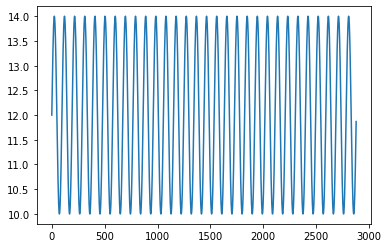

In [73]:
plt.plot(emu_observ_test_user1._T_riv)

In [74]:
emu_observ_test_user1._generate_Temp_aq_series()
emu_observ_test_user1._dH

array([None], dtype=object)

In [75]:
emu_observ_test_user1._generate_T_riv_dH_series()
emu_observ_test_user1._T_riv_dH_measures

[(datetime.datetime(2010, 12, 1, 0, 0), (0.0, 12.0)),
 (datetime.datetime(2010, 12, 1, 0, 15),
  (0.0004674972038805549, 12.130806258460286)),
 (datetime.datetime(2010, 12, 1, 0, 30),
  (0.0009349841903839276, 12.261052384440102)),
 (datetime.datetime(2010, 12, 1, 0, 45),
  (0.0014024507423562415, 12.390180644032256)),
 (datetime.datetime(2010, 12, 1, 1, 0),
  (0.0018698866430902268, 12.517638090205041)),
 (datetime.datetime(2010, 12, 1, 1, 15),
  (0.0023372816765485113, 12.642878930606322)),
 (datetime.datetime(2010, 12, 1, 1, 30),
  (0.0028046256275868963, 12.76536686473018)),
 (datetime.datetime(2010, 12, 1, 1, 45),
  (0.0032719082821776138, 12.884577380438003)),
 (datetime.datetime(2010, 12, 1, 2, 0), (0.0037391194276325626, 13.0)),
 (datetime.datetime(2010, 12, 1, 2, 15),
  (0.004206248852826502, 13.111140466039204)),
 (datetime.datetime(2010, 12, 1, 2, 30),
  (0.004673286348420234, 13.21752285801744)),
 (datetime.datetime(2010, 12, 1, 2, 45),
  (0.005140221707083721, 13.318691630

In [76]:
emu_observ_test_user1._generate_Shaft_Temp_series()
emu_observ_test_user1._T_Shaft_measures # à l'instant initial on a une colonne thermalisée

[(datetime.datetime(2010, 12, 1, 0, 0), array([12., 12., 12., 12.])),
 (datetime.datetime(2010, 12, 1, 0, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 0, 30),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 0, 45),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 1, 0),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 1, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 1, 30),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 1, 45),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 2, 0),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.20000e+01])),
 (datetime.datetime(2010, 12, 1, 2, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 1.2

## Test de génération des points T1, T2, T3 avec le modèle direct

In [77]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name ="Couche en sable"
zLow = 0.4
moinslog10K = 3
n = 0.1
lambda_s = 2 
rhos_cs = 4e6

# on utilise les mesures générées précédemment
col_dict = {
	"river_bed": 1., 
    "depth_sensors": [.1, .2, .3, .4], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._T_riv_dH_measures,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}

col = Column.from_dict(col_dict)

# modèle une couche
layers_list= layersListCreator([(name, zLow, moinslog10K, n, lambda_s, rhos_cs)])

In [78]:
# on résoud le modèle direct avec les observations simulées
nb_cells = 100
emu_observ_test_user1._measures_column_one_layer(col, layers_list, nb_cells)
emu_observ_test_user1._T_Shaft

--- Compute Solve Transi ---
One layer : moinslog10K = 3, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


array([[12.        , 12.        , 12.        , 12.        ],
       [12.00400066, 12.00096321, 11.96767807, 12.        ],
       [12.00749111, 12.00156403, 11.93394089, 12.        ],
       ...,
       [11.54055977, 11.47041512, 11.40089512, 12.        ],
       [11.66905022, 11.59809208, 11.52758217, 12.        ],
       [11.79897213, 11.72749805, 11.65631104, 12.        ]])

In [79]:
emu_observ_test_user1._T_Shaft[:,2]

array([12.        , 11.96767807, 11.93394089, ..., 11.40089512,
       11.52758217, 11.65631104])

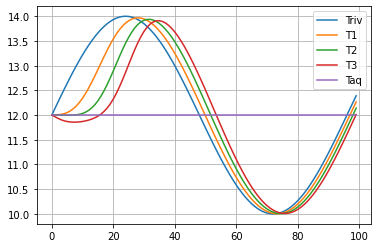

In [80]:
# les sorties des différents capteurs après passage dans le modèle direct
nt = 100
plt.plot(emu_observ_test_user1._T_riv[:nt], label="Triv")
n_sens = len(emu_observ_test_user1._T_Shaft[0])
for i in range(n_sens-1):
    plt.plot(emu_observ_test_user1._T_Shaft[:nt,i], label="T{}".format(i+1))
plt.plot(emu_observ_test_user1._T_Shaft[:nt,n_sens-1], label="Taq")
plt.legend()
plt.grid()

## 2. Cas avec perturbation des observations

In [81]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 4
T_riv_offset = 16
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0.1
dH_offset = 0
P_dh = 14*24*4*dt

In [82]:
time_series_dict_user2 = {
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

emu_observ_test_user2 = Time_series.from_dict(time_series_dict_user2)

In [83]:
emu_observ_test_user2._generate_perturb_T_riv_dH_series()
emu_observ_test_user2._generate_perturb_Shaft_Temp_series()

In [90]:
emu_observ_test_user2._dates

array([datetime.datetime(2011, 8, 1, 0, 0),
       datetime.datetime(2011, 8, 1, 0, 15),
       datetime.datetime(2011, 8, 1, 0, 30), ...,
       datetime.datetime(2011, 8, 31, 23, 15),
       datetime.datetime(2011, 8, 31, 23, 30),
       datetime.datetime(2011, 8, 31, 23, 45)], dtype=object)

In [91]:
emu_observ_test_user2._T_riv_dH_measures

In [85]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name ="Couche en sable"
zLow = 0.4
moinslog10K = 3
n = 0.1
lambda_s = 2 
rhos_cs = 4e6

# on utilise les mesures générées précédemment
col_dict2 = {
	"river_bed": 1., 
    "depth_sensors": [.1, .2, .3, .4], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user2._T_riv_dH_measures,
    "T_measures": emu_observ_test_user2._T_Shaft_measures,
    "sigma_meas_P": emu_observ_test_user2._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user2._sigma_T, #float
}

col2 = Column.from_dict(col_dict2)

# modèle une couche
layers_list2= layersListCreator([(name, zLow, moinslog10K, n, lambda_s, rhos_cs)])

TypeError: 'NoneType' object is not iterable

In [ ]:
nb_cells = 100
emu_observ_test_user1._measures_column_one_layer(col2, layers_list2, nb_cells)

In [ ]:
emu_observ_test_user2._generate_perturb_Shaft_Temp_series()
emu_observ_test_user2._generate_perturb_T_riv_dH_series()

array([[1.39212405e+01, 1.40703439e+01, 1.40708034e+01, 1.40333683e+01],
       [9.59595061e+05, 9.59594695e+05, 9.59595015e+05, 1.40978806e+01],
       [9.59595053e+05, 9.59595022e+05, 9.59595007e+05, 1.38918249e+01],
       ...,
       [9.59594930e+05, 9.59595155e+05, 9.59595013e+05, 1.39045025e+01],
       [9.59594932e+05, 9.59594873e+05, 9.59595017e+05, 1.41433880e+01],
       [9.59594883e+05, 9.59594904e+05, 9.59595077e+05, 1.41267418e+01]])

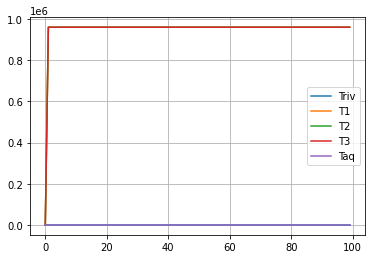

In [ ]:
# les sorties des différents capteurs après passage dans le modèle direct
nt = 100
plt.plot(emu_observ_test_user2._T_riv[:nt], label="Triv")
n_sens = len(emu_observ_test_user2._T_Shaft[0])
for i in range(n_sens-1):
    plt.plot(emu_observ_test_user2._T_Shaft[:nt,i], label="T{}".format(i+1))
plt.plot(emu_observ_test_user2._T_Shaft[:nt,n_sens-1], label="Taq")
plt.legend()
plt.grid()